In [27]:
import csv

with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
  
header = data[0]
data = data[1:]

In [28]:
# select only data from USW00014739, it has the most data

data = [row for row in data if row[0] == 'USW00014739']

print(*[f"{label}: {value}" for label, value in zip(header, data[0]) if value != "" and not label.endswith("ATTRIBUTES")], sep="\n")

STATION: USW00014739
NAME: BOSTON, MA US
LATITUDE: 42.36057
LONGITUDE: -71.00975
ELEVATION: 3.2
DATE: 2021-04-22
AWND: 9.0
PRCP: 0.0
SNOW: 0.0
TAVG: 5.3
TMAX: 8.3
TMIN: 1.1
WDF2:   280
WDF5:   280
WSF2: 13.9
WSF5: 18.3


In [35]:
# get the temperature, precipitation, and wind data as lists

fields = {'TAVG', 'TMAX', 'TMIN', 'PRCP', 'AWND'}

plots = {}

for row in data:
    for label, value in zip(header, row):
        if label in fields:
            plots.setdefault(label, []).append(value)

print(*[f"{label}: {', '.join(values[:5])}..." for label, values in plots.items()], sep="\n")

AWND: 9.0, 7.6, 5.5, 3.4, 6.8...
PRCP: 0.0, 0.0, 0.0, 2.8, 0.0...
TAVG: 5.3, 8.6, 15.9, 13.0, 10.9...
TMAX: 8.3, 15.6, 23.3, 13.9, 13.9...
TMIN: 1.1, 3.3, 10.0, 10.0, 8.3...


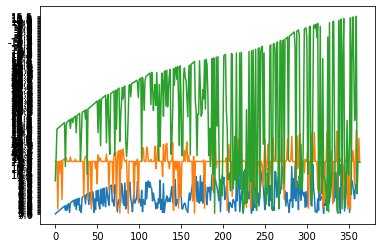

In [40]:
# plot the data using matplotlib

import matplotlib.pyplot as plt

plt.plot(plots['AWND'])
plt.plot(plots['PRCP'])
plt.plot(plots['TAVG'])

plt.show()

In [57]:
# generate a MIDI file

import mido

file = mido.MidiFile()
track = mido.MidiTrack()

file.tracks.append(track)

track.append(mido.Message('program_change', program=0, time=0))

for i, value in enumerate(plots['TAVG']):
    if value != "":
        track.append(mido.Message('note_on', note=int(round(float(value)) + 30), velocity=64, time=0))
        track.append(mido.Message('note_off', note=int(round(float(value)) + 30), velocity=64, time=20))

file.save('data.mid')